In [27]:
import pandas as pd
Dataset = pd.read_csv("C:\\Users\\atang\\OneDrive\\Documents\\Data Science MSc\\Individual Research Project\\Database.csv")
Dataset.head()




,Unnamed: 0,Time,Season,Day_of_the_week,DHI,DNI,GHI,Wind_speed,Humidity,Temperature,PV_production,Wind_production,Electric_demand
0,0,2019-01-01-T00:00,1,1,0.0,0.0,0.0,2.88,56.036,1.82,0,2810,22216
1,1,2019-01-01-T00:05,1,1,0.0,0.0,0.0,2.88,56.036,1.82,0,2862,22106
2,2,2019-01-01-T00:10,1,1,0.0,0.0,0.0,2.88,56.194,1.78,0,2916,22130
3,3,2019-01-01-T00:15,1,1,0.0,0.0,0.0,2.88,56.344,1.74,0,2920,22040
4,4,2019-01-01-T00:20,1,1,0.0,0.0,0.0,2.84,56.440,1.72,0,2902,21963


In [28]:
Dataset.shape

(315648, 13)

In [29]:
#Convert the time column to Datetime for time series analysis
Dataset['Time'] = pd.to_datetime(Dataset['Time'])
Dataset.set_index('Time', inplace=True)
Dataset.head()

,Unnamed: 0,Season,Day_of_the_week,DHI,DNI,GHI,Wind_speed,Humidity,Temperature,PV_production,Wind_production,Electric_demand
Time,,,,,,,,,,,,
2019-01-01 00:00:00,0,1,1,0.0,0.0,0.0,2.88,56.036,1.82,0,2810,22216
2019-01-01 00:05:00,1,1,1,0.0,0.0,0.0,2.88,56.036,1.82,0,2862,22106
2019-01-01 00:10:00,2,1,1,0.0,0.0,0.0,2.88,56.194,1.78,0,2916,22130
2019-01-01 00:15:00,3,1,1,0.0,0.0,0.0,2.88,56.344,1.74,0,2920,22040
2019-01-01 00:20:00,4,1,1,0.0,0.0,0.0,2.84,56.440,1.72,0,2902,21963


In [30]:
# Generate a complete date range
full_range = pd.date_range(start=Dataset.index.min(), end=Dataset.index.max(), freq='5min')

# Identify missing dates
missing_dates = full_range.difference(Dataset.index)

# Print the missing dates
print("Missing dates:")
print(missing_dates)

Missing dates:
DatetimeIndex([], dtype='datetime64[ns]', freq='5T')


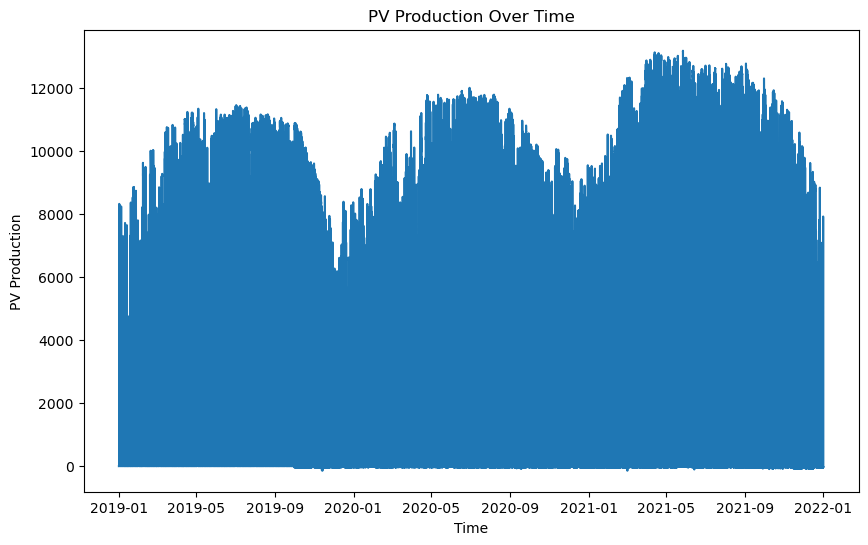

In [31]:
import matplotlib.pyplot as plt

# Plot the PV_production series to check for stationary and check for time series
plt.figure(figsize=(10, 6))
plt.plot(Dataset['PV_production'])
plt.title('PV Production Over Time')
plt.xlabel('Time')
plt.ylabel('PV Production')
plt.show()

In [32]:
# Filter data to keep only the year 2020
Dataset_2020 = Dataset[(Dataset.index.year == 2020)]
Dataset_2020.head()
Dataset_2020.shape

(105408, 12)

In [33]:
Dataset_2020 = Dataset_2020.drop(['Wind_production', 'Electric_demand', 'Unnamed: 0'], axis = 1)
print(Dataset_2020.columns)

Index(['Season', 'Day_of_the_week', 'DHI', 'DNI', 'GHI', 'Wind_speed',
       'Humidity', 'Temperature', 'PV_production'],
      dtype='object')


In [34]:
Dataset_2020['Wind_speed'] = pd.to_numeric(Dataset_2020['Wind_speed'], downcast='float')
Dataset_2020['Season'] = pd.to_numeric(Dataset_2020['Season'], downcast='float')
Dataset_2020['Day_of_the_week'] = pd.to_numeric(Dataset_2020['Day_of_the_week'], downcast='float')
Dataset_2020['DHI'] = pd.to_numeric(Dataset_2020['DHI'], downcast='float')
Dataset_2020['DNI'] = pd.to_numeric(Dataset_2020['DNI'], downcast='float')
Dataset_2020['GHI'] = pd.to_numeric(Dataset_2020['GHI'], downcast='float')
Dataset_2020['Humidity'] = pd.to_numeric(Dataset_2020['Humidity'], downcast='float')
Dataset_2020['Temperature'] = pd.to_numeric(Dataset_2020['Temperature'], downcast='float')
Dataset_2020['PV_production'] = pd.to_numeric(Dataset_2020['PV_production'], downcast='float')

In [35]:
#Check if there any negative values within the dataset
# Specify the columns to check
columns_to_check = ['Season', 'Day_of_the_week', 'DHI', 'DNI', 'GHI',
       'Wind_speed', 'Humidity', 'Temperature', 'PV_production']

# Check for negative values in each column
for column in columns_to_check:
    negative_values = Dataset_2020[Dataset_2020[column] < 0]
    if not negative_values.empty:
        print(f"Negative values found in column '{column}':")
        print(negative_values)
    else:
        print(f"No negative values found in column '{column}'.")

No negative values found in column 'Season'.
No negative values found in column 'Day_of_the_week'.
No negative values found in column 'DHI'.
No negative values found in column 'DNI'.
No negative values found in column 'GHI'.
No negative values found in column 'Wind_speed'.
No negative values found in column 'Humidity'.
No negative values found in column 'Temperature'.
Negative values found in column 'PV_production':
                     Season  Day_of_the_week  DHI  DNI  GHI  Wind_speed  \
Time                                                                      
2020-01-01 00:00:00     1.0              2.0  0.0  0.0  0.0        1.06   
2020-01-01 00:05:00     1.0              2.0  0.0  0.0  0.0        1.06   
2020-01-01 00:10:00     1.0              2.0  0.0  0.0  0.0        1.08   
2020-01-01 00:15:00     1.0              2.0  0.0  0.0  0.0        1.10   
2020-01-01 00:20:00     1.0              2.0  0.0  0.0  0.0        1.10   
...                     ...              ...  ...  ... 

In [36]:
# Replace negative PV_production values with zero
Dataset_2020.loc[Dataset_2020['PV_production'] < 0, 'PV_production'] = 0

In [37]:
# Handle any remaining non-numeric or NA values in PV_production
Dataset_2020 = Dataset_2020.dropna(subset=['PV_production'])
Dataset_2020.shape

(105408, 9)

In [38]:
#Handling missing values 
print(Dataset_2020.isnull().sum())

Season             0
Day_of_the_week    0
DHI                0
DNI                0
GHI                0
Wind_speed         0
Humidity           0
Temperature        0
PV_production      0
dtype: int64


In [39]:
#Handling outliers
#calculate and remove outliers
#define a function to calculate and return the outliers
def calculate_outliers(column_series):
    Q1 = column_series.quantile(0.25)
    Q3 = column_series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column_series[(column_series < lower_bound) | (column_series > upper_bound)]
    return outliers

# Call the function for each column you want to find outliers for and print the results
print(calculate_outliers(Dataset_2020['DHI']))
print(calculate_outliers(Dataset_2020['DNI']))
print(calculate_outliers(Dataset_2020['GHI']))
print(calculate_outliers(Dataset_2020['PV_production']))
print(calculate_outliers(Dataset_2020['Humidity']))
print(calculate_outliers(Dataset_2020['Temperature']))
print(calculate_outliers(Dataset_2020['Wind_speed']))


print(Dataset_2020.shape)

#outliers will not be deleted as this could represent periods with high PV production.

Time
2020-03-01 10:35:00    264.399994
2020-03-01 10:50:00    266.399994
2020-03-01 11:35:00    262.000000
2020-03-01 12:30:00    256.799988
2020-03-01 12:35:00    284.799988
                          ...    
2020-09-18 11:55:00    264.600006
2020-09-18 12:00:00    277.200012
2020-09-18 12:05:00    269.000000
2020-10-06 12:50:00    255.800003
2020-10-10 10:25:00    252.199997
Name: DHI, Length: 1666, dtype: float32
Series([], Name: DNI, dtype: float32)
Series([], Name: GHI, dtype: float32)
Series([], Name: PV_production, dtype: float32)
Series([], Name: Humidity, dtype: float32)
Series([], Name: Temperature, dtype: float32)
Time
2020-01-16 10:35:00    4.84
2020-01-16 10:40:00    4.84
2020-01-16 10:45:00    4.84
2020-01-16 10:50:00    4.86
2020-01-16 10:55:00    4.86
                       ... 
2020-12-17 13:55:00    4.98
2020-12-17 14:00:00    5.02
2020-12-17 14:05:00    4.98
2020-12-17 14:10:00    4.92
2020-12-17 14:15:00    4.88
Name: Wind_speed, Length: 2569, dtype: float32
(105408,

In [40]:
Dataset_2020.head()

,Season,Day_of_the_week,DHI,DNI,GHI,Wind_speed,Humidity,Temperature,PV_production
Time,,,,,,,,,
2020-01-01 00:00:00,1.0,2.0,0.0,0.0,0.0,1.06,62.807999,8.54,0.0
2020-01-01 00:05:00,1.0,2.0,0.0,0.0,0.0,1.06,62.813999,8.54,0.0
2020-01-01 00:10:00,1.0,2.0,0.0,0.0,0.0,1.08,62.928001,8.52,0.0
2020-01-01 00:15:00,1.0,2.0,0.0,0.0,0.0,1.10,62.998001,8.50,0.0
2020-01-01 00:20:00,1.0,2.0,0.0,0.0,0.0,1.10,62.889999,8.52,0.0


In [41]:
Dataset_new = Dataset_2020.to_csv('C:\\Users\\atang\\OneDrive\\Documents\\Data Science MSc\\Individual Research Project\\Cleaned Database.csv', index=False)

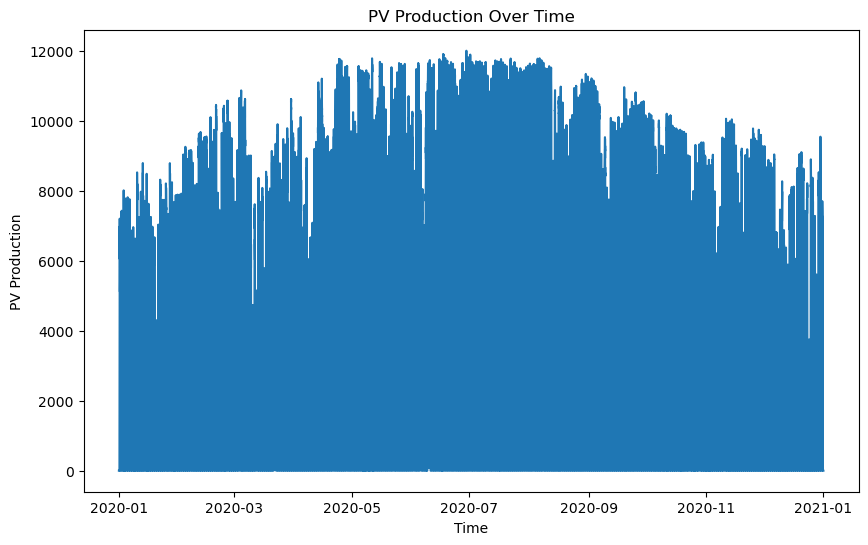

In [42]:
import matplotlib.pyplot as plt
# Plot the PV_production series to check for stationary check for time series
plt.figure(figsize=(10, 6))
plt.plot(Dataset_2020['PV_production'])
plt.title('PV Production Over Time')
plt.xlabel('Time')
plt.ylabel('PV Production')
plt.show()

In [43]:
#Test for stationary within the time series data

from statsmodels.tsa.stattools import adfuller

result = adfuller(Dataset_2020['PV_production'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -43.12856951059699
p-value: 0.0


In [44]:
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import TimeSeriesSplit
from xgboost import XGBRegressor
import numpy as np

# Create lag features function (for individual split)
def create_lag_features(data, lags, target_column):
    lagged_data = data.copy()
    for lag in lags:
        lagged_data[f'{target_column}_lag_{lag}'] = lagged_data[target_column].shift(lag)
    return lagged_data.dropna()

# Define lags
lags = [1, 2, 3, 4, 5]

# Initialise TimeSeriesSplit
n_splits = 3
tscv = TimeSeriesSplit(n_splits=n_splits)
r2_scores = []
mse_scores = []

# Cross-validation
for fold, (train_index, test_index) in enumerate(tscv.split(Dataset_2020), 1):
    train_data, test_data = Dataset_2020.iloc[train_index], Dataset_2020.iloc[test_index]
    
    # Create lag features based on training data
    train_data = create_lag_features(train_data, lags, 'PV_production')
    test_data = create_lag_features(test_data, lags, 'PV_production')
    
    # Split into features and target
    X_train = train_data.drop(columns=['PV_production'])
    y_train = train_data['PV_production']
    X_test = test_data.drop(columns=['PV_production'])
    y_test = test_data['PV_production']

    # Model training
    model = XGBRegressor(objective='reg:squarederror')
    model.fit(X_train, y_train)

    # Prediction
    y_pred = model.predict(X_test)

    # Calculate metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    r2_scores.append(r2)
    mse_scores.append(mse)

    # Print individual fold results
    print(f"Fold {fold}: R2 Score = {r2:.4f}, MSE = {mse:.4f}")

# Average metrics
average_r2 = np.mean(r2_scores)
average_mse = np.mean(mse_scores)

# Print average metrics
print(f'\nAverage R2 Score: {average_r2:.4f}')
print(f'Average MSE: {average_mse:.4f}')

# Train final model on the entire dataset
final_data = create_lag_features(Dataset_2020, lags, 'PV_production')
final_features = final_data.drop(columns=['PV_production'])
final_target = final_data['PV_production']

final_model = XGBRegressor(objective='reg:squarederror')
final_model.fit(final_features, final_target)



#TEST MODEL AGAINST UNSEEN DATA
# Load new dataset for testing
new_dataset = pd.read_csv("C:\\Users\\atang\\OneDrive\\Documents\\Data Science MSc\\Individual Research Project\\Database.csv")

# Convert the time column to datetime for time series analysis
new_dataset['Time'] = pd.to_datetime(new_dataset['Time'])
new_dataset.set_index('Time', inplace=True)

# Filter data for the year 2021
Dataset_2021 = new_dataset[(new_dataset.index.year == 2021)]
Dataset_2021 = Dataset_2021.drop(['Wind_production', 'Electric_demand', 'Unnamed: 0'], axis=1)



columns_to_convert = ['Wind_speed', 'Season', 'Day_of_the_week', 'DHI', 'DNI', 'GHI', 'Humidity', 'Temperature', 'PV_production']
for column in columns_to_convert:
    Dataset_2021[column] = pd.to_numeric(Dataset_2021[column], downcast='float')

# Create lag features for the new dataset
Dataset_2021 = create_lag_features(Dataset_2021, lags, 'PV_production')

# Test only a subset of Dataset_2021 to reduce computer processing time
Dataset_2021 = Dataset_2021.iloc[:10000]

# Split new dataset into features and target
new_features = Dataset_2021.drop(columns=['PV_production'])
new_target = Dataset_2021['PV_production']

# Evaluate final model on the new test set
new_predictions = final_model.predict(new_features)

# Calculate metrics on the new test set
new_r2 = r2_score(new_target, new_predictions)
new_mse = mean_squared_error(new_target, new_predictions)

print(f'\nNew Dataset R2 Score: {new_r2:.4f}')
print(f'New Dataset MSE: {new_mse:.4f}')


Fold 1: R2 Score = 0.9961, MSE = 79452.2266
Fold 2: R2 Score = 0.9997, MSE = 5968.4780
Fold 3: R2 Score = 0.9995, MSE = 6590.7173

Average R2 Score: 0.9985
Average MSE: 30670.4746

New Dataset R2 Score: 0.9991
New Dataset MSE: 10290.7656


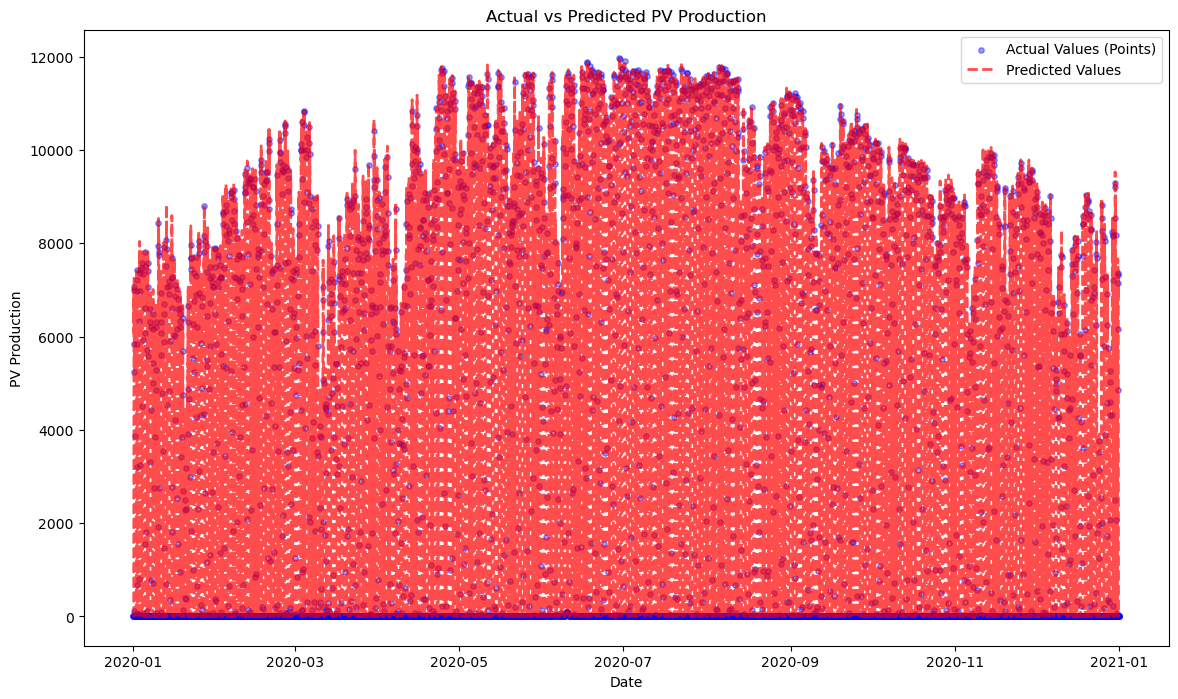

In [46]:
# Predict using the final model
final_predictions = final_model.predict(final_features)

# Sample every 20th point to reduce density
sample_rate = 20
sampled_index = final_data.index[::sample_rate]
sampled_target = final_target[::sample_rate] 
sampled_predictions = final_predictions[::sample_rate]

# Plotting actual vs. predicted values in a single plot
plt.figure(figsize=(14, 8))

# Plot actual values
plt.scatter(sampled_index, sampled_target, label='Actual Values (Points)', color='b', s=15, alpha=0.4)

# Plot predicted values
plt.plot(final_features.index, final_predictions, label='Predicted Values', color='r', linewidth=2, linestyle='--', alpha=0.7)


plt.xlabel('Date')
plt.ylabel('PV Production')
plt.title('Actual vs Predicted PV Production')
plt.legend()

# Display the plot
plt.show()


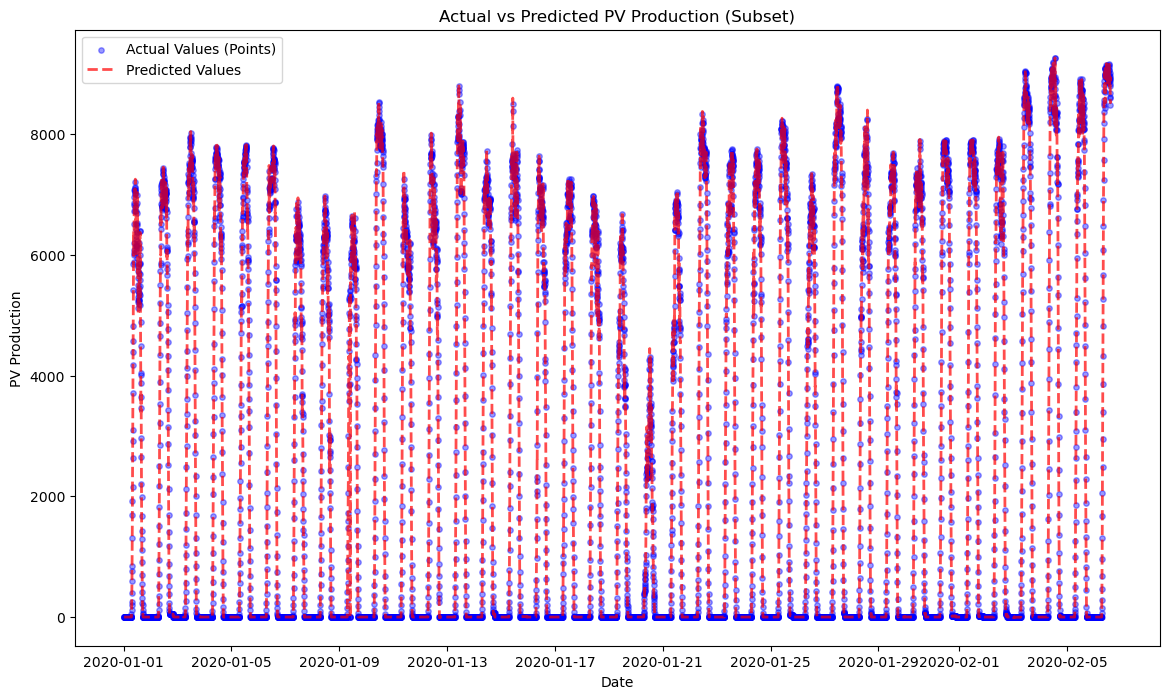

In [47]:
# PLOT A SUBSET OF THE ABOVE PLOT FOR BETTER VISUALISATION
# Choose a smaller subset of the data
subset_index = final_data.index[:int(len(final_data) * 0.1)]  # Plot only 10% of the data
subset_target = final_target[:int(len(final_target) * 0.1)]
subset_predictions = final_predictions[:int(len(final_predictions) * 0.1)]

# Plotting actual vs. predicted values in a single plot for the subset
plt.figure(figsize=(14, 8))

# Plot actual values
plt.scatter(subset_index, subset_target, label='Actual Values (Points)', color='b', s=15, alpha=0.4)

# Plot predicted values
plt.plot(subset_index, subset_predictions, label='Predicted Values', color='r', linewidth=2, linestyle='--', alpha=0.7)

plt.xlabel('Date')
plt.ylabel('PV Production')
plt.title('Actual vs Predicted PV Production (Subset)')
plt.legend()

# Display the plot
plt.show()

